## Exercícios 

Aplique os algoritmos implementados nesta atividade nas imagens em níveis de cinza (apenas uma camada) de “img_aluno1” e “img_aluno2”.

* Considere a escolha de img_aluno1 com imagem de paisagem
* Considere a escolha de img_aluno2 com imagem que contenha pessoa(s)

*Podem se basear no exemplo de função image_convolution ou cv2.filter2D

In [1]:
# Importando as bibliotecas
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Carregando as imagens
img_aluno1 = cv2.imread('xp_landscape.png')
img_aluno2 = cv2.imread('feb_army.jpg') # já esta em gray scale
img_sum_sub1 = cv2.imread('img_sum_sub1.png')
img_sum_sub2 = cv2.imread('img_sum_sub2.png')

# Convertendo para gray scale
img_aluno1_pb = cv2.cvtColor(img_aluno1, cv2.COLOR_BGR2GRAY) 
img_aluno2_pb = cv2.cvtColor(img_aluno2, cv2.COLOR_BGR2GRAY) # somente uma dimensão

Text(0.5, 1.0, 'Pessoas')

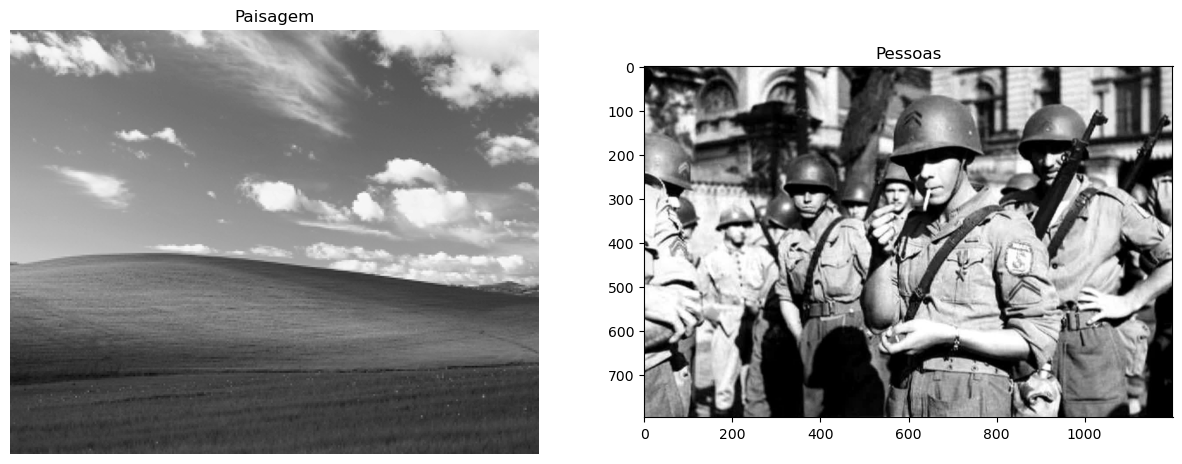

In [3]:
# Mostrando as imagens
plt.figure(figsize=(15, 15)) 
plt.subplot(121)
plt.imshow(img_aluno1_pb, cmap="gray", vmin=0, vmax=255)
plt.title('Paisagem')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_aluno2_pb, cmap="gray", vmin=0, vmax=255)
plt.title('Pessoas')

In [4]:
# Função para mostrar as imagens com suas transformações ao lado
def show_img(img1, img2, img3, img4):
    plt.figure(figsize=(15,15)) 

    plt.subplot(221)
    plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
    plt.title('Imagem 1 Original')
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
    plt.title('Imagem 1 Modificada')
    plt.axis('off')

    plt.subplot(223)
    plt.imshow(img3, cmap="gray", vmin=0, vmax=255)
    plt.title('Imagem 2 Original')
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(img4, cmap="gray", vmin=0, vmax=255)
    plt.title('Imagem 2 Modificada')
    plt.axis('off')

    plt.show()

In [5]:
# Funcao de convolucao
def image_convolution(f, w, debug=False):
    N,M = f.shape
    n,m = w.shape
    
    a = int((n-1)/2)
    b = int((m-1)/2)

    # obtem filtro invertido
    w_flip = np.flip( np.flip(w, 0) , 1)

    g = np.zeros(f.shape, dtype=np.uint8)

    # para cada pixel:
    for x in range(a,N-a):
        for y in range(b,M-b):
            # obtem submatriz a ser usada na convolucao
            sub_f = f[ x-a : x+a+1 , y-b:y+b+1 ]
            
            if (debug==True):
                print(str(x)+","+str(y)+" - subimage:\n"+str(sub_f))
                
            # calcula g em x,y
            g[x,y] = np.sum( np.multiply(sub_f, w_flip)).astype(np.uint8)

    return g

In [6]:
# Funções para K-vizinhos
def meanKernel(center,matrix,k): #center: coordenada central a ser filtrada , matrix: o kernel , k: the número de vizinhos
    matrix = matrix.astype('int')
    list1 = [[abs(i-center),i] for i in matrix.ravel()] #Expanda a matriz onde o alvo está localizado, subtraia e classifique o primeiro k correspondente
    list1.sort() #ordena a lista
    # print(list1)
    #soma todos os k vizinhos e computa a media
    # print(round(np.array(list1)[1:k+1,1].mean()))
    return round(np.array(list1)[1:k+1,1].mean()) # retorna o valor arrendodado para novo valor da coordenada filtrada
    

def KNN(img,kernel,k):
    result_img = img.copy()
    for i in range(result_img.shape[0]-kernel+1):  #（0,3）
        for j in range(result_img.shape[0]-kernel+1):
            result_img[i+int(kernel/2)][j+int(kernel/2)] = meanKernel(result_img[i+int(kernel/2)][j+int(kernel/2)],img[i:i+kernel,j:j+kernel],5)
    return result_img

Aplique os algoritmos solicitados abaixo. Selecione as imagens necessárias conforme a requisição dos próximos exercícios.

* Não há regras para essas imagens, podem ser de qualquer coisa, coloridas ou escala de cinza. 

1) Implemente o filtro de suavização pela média da vizinhança

In [7]:
# Criando a máscara do filtro
w_med = np.matrix([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

img_aluno1_med = image_convolution(img_aluno1_pb, w_med)
img_aluno2_med = image_convolution(img_aluno2_pb, w_med)

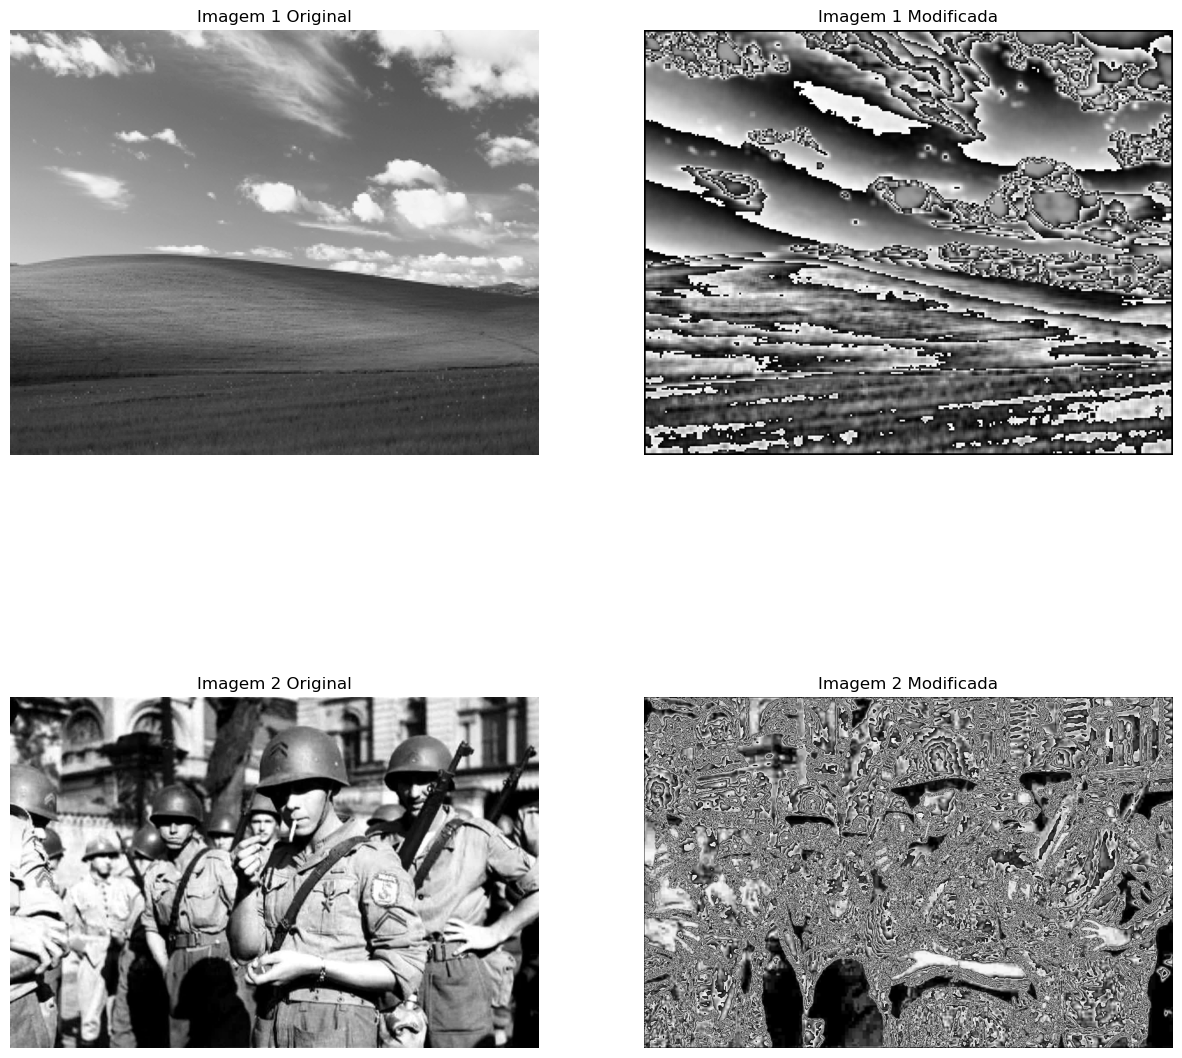

In [8]:
show_img(img_aluno1_pb, img_aluno1_med, img_aluno2_pb, img_aluno2_med)

2) Implemente o filtro de suavização pela média dos k vizinhos mais próximos

In [9]:
# Templete do filtro n*n
kernel = 3 

# Quantidade de vizinhos
k = 8

# Calculando o filtro k-mean para as duas imagens
img_aluno1_kmean = KNN(img_aluno1_pb, kernel, k)
img_aluno2_kmean = KNN(img_aluno2_pb, kernel, k)

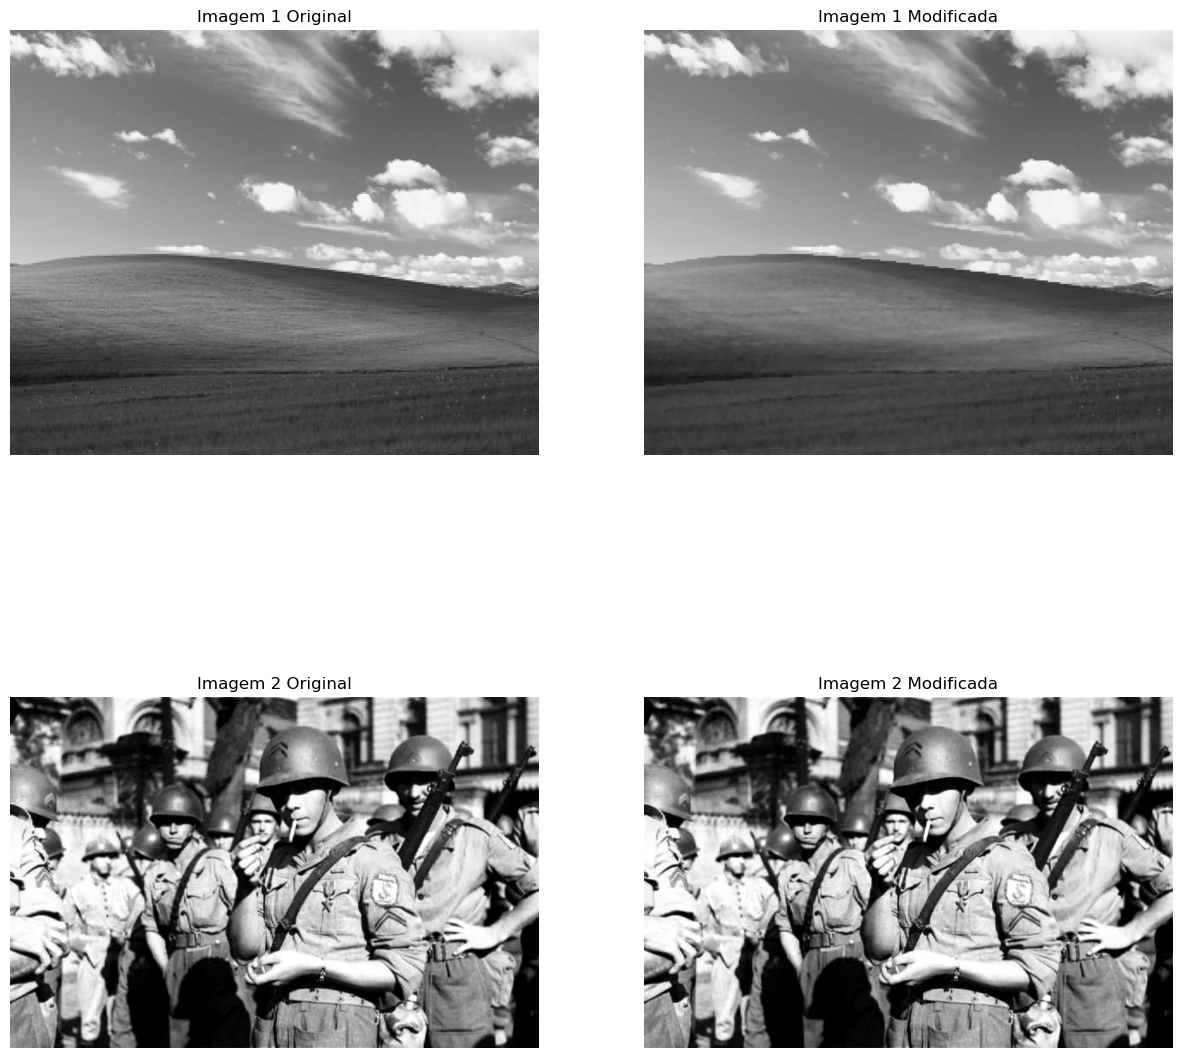

In [10]:
show_img(img_aluno1_pb, img_aluno1_kmean, img_aluno2_pb, img_aluno2_kmean)

3) Implemente o filtro da mediana.

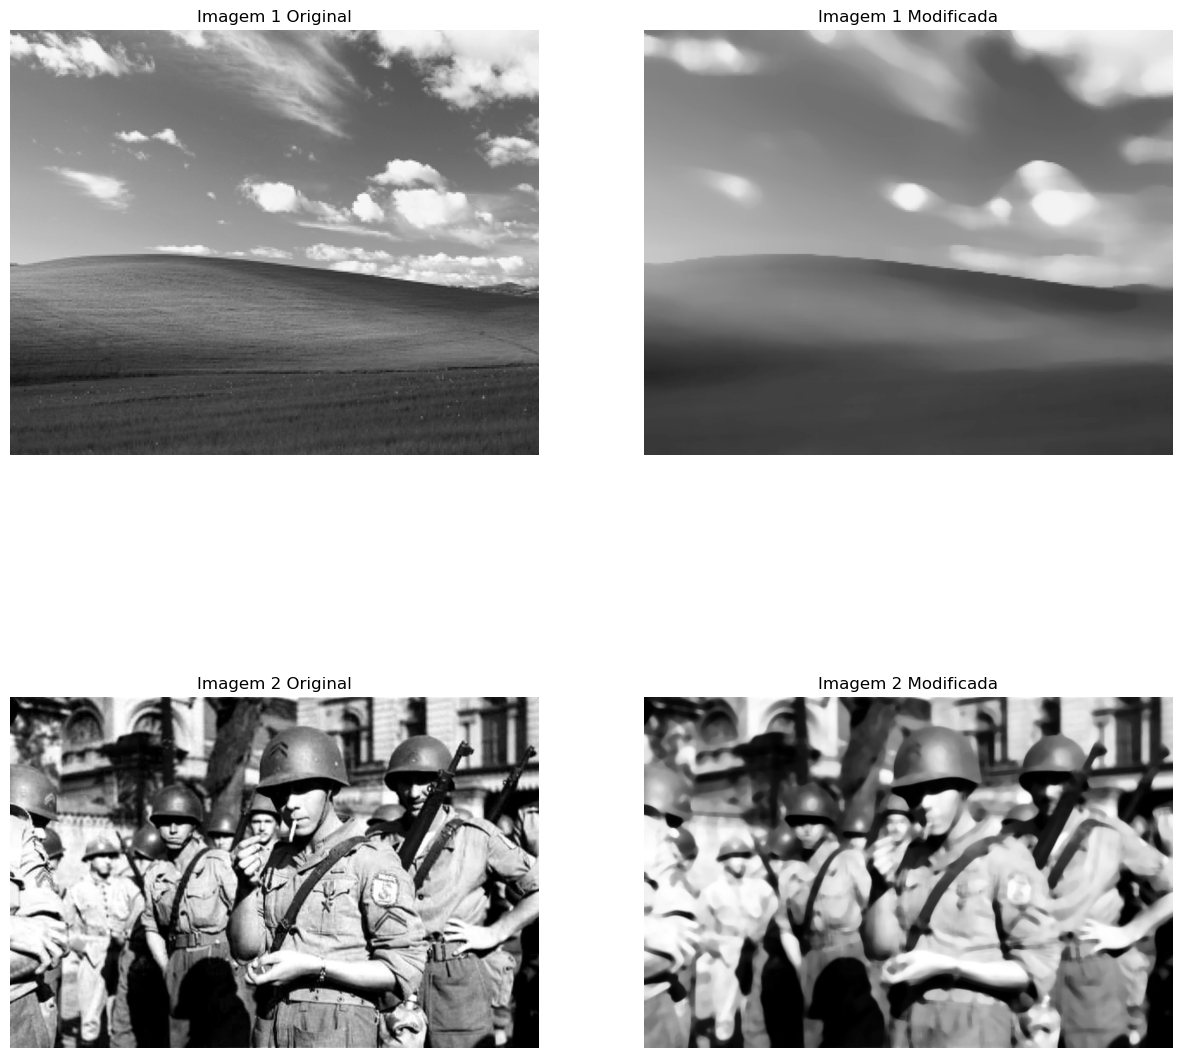

In [11]:
img_aluno1_median = cv2.medianBlur(img_aluno1_pb, 15)
img_aluno2_median = cv2.medianBlur(img_aluno2_pb, 15)

show_img(img_aluno1_pb, img_aluno1_median, img_aluno2_pb, img_aluno2_median)

4) Implemente o operador Laplaciano.

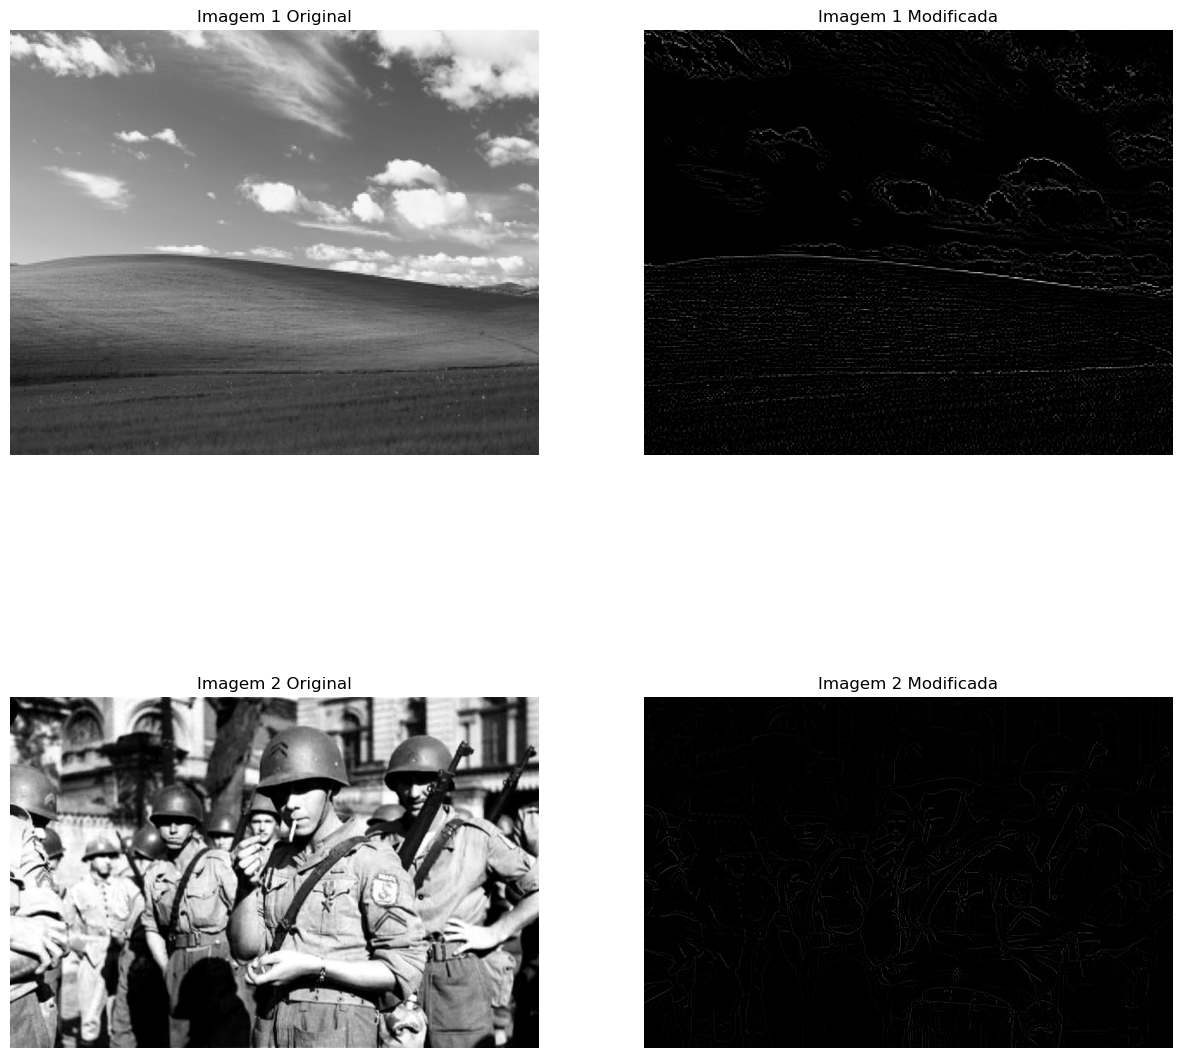

In [12]:
img_aluno1_laplacian = cv2.Laplacian(img_aluno1_pb, cv2.CV_64F)
img_aluno2_laplacian = cv2.Laplacian(img_aluno2_pb, cv2.CV_64F)

show_img(img_aluno1_pb, img_aluno1_laplacian, img_aluno2_pb, img_aluno2_laplacian)

5) Implemente o detector de bordas de Roberts.

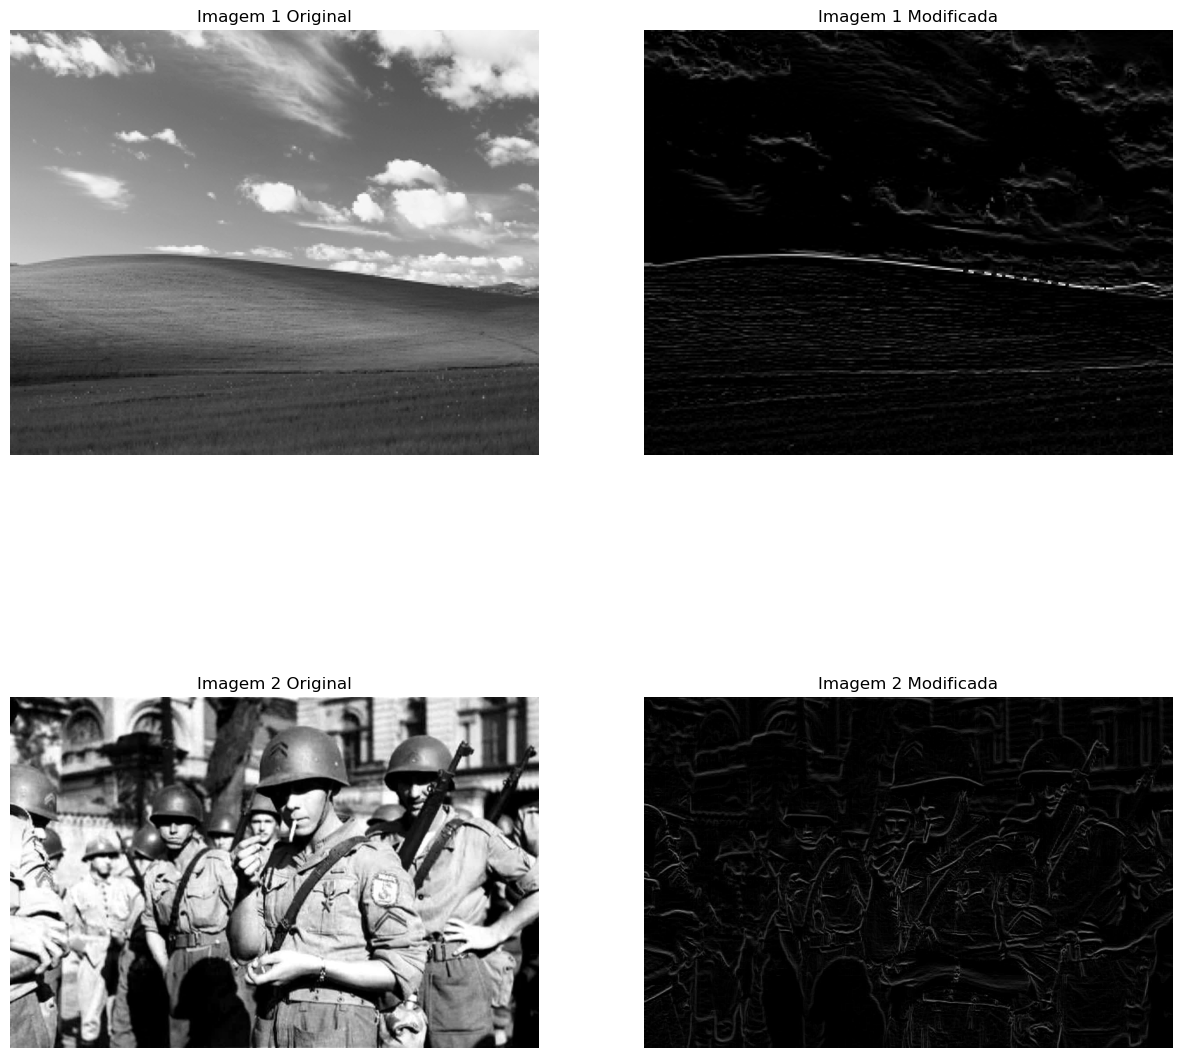

In [13]:
kernelx = np.array([[1,0], [0,-1]])
kernely = np.array([[0,1], [-1,0]])

img_aluno1_bob_x = cv2.filter2D(img_aluno1_pb, -1, kernelx)
img_aluno1_bob_y = cv2.filter2D(img_aluno1_pb, -1, kernely)
img_aluno1_bob = img_aluno1_bob_x + img_aluno1_bob_y

img_aluno2_bob_x = cv2.filter2D(img_aluno2_pb, -1, kernelx)
img_aluno2_bob_y = cv2.filter2D(img_aluno2_pb, -1, kernely)
img_aluno2_bob = img_aluno2_bob_x + img_aluno2_bob_y

show_img(img_aluno1_pb, img_aluno1_bob, img_aluno2_pb, img_aluno2_bob)

6) Implemente o detector de bordas de Prewitt

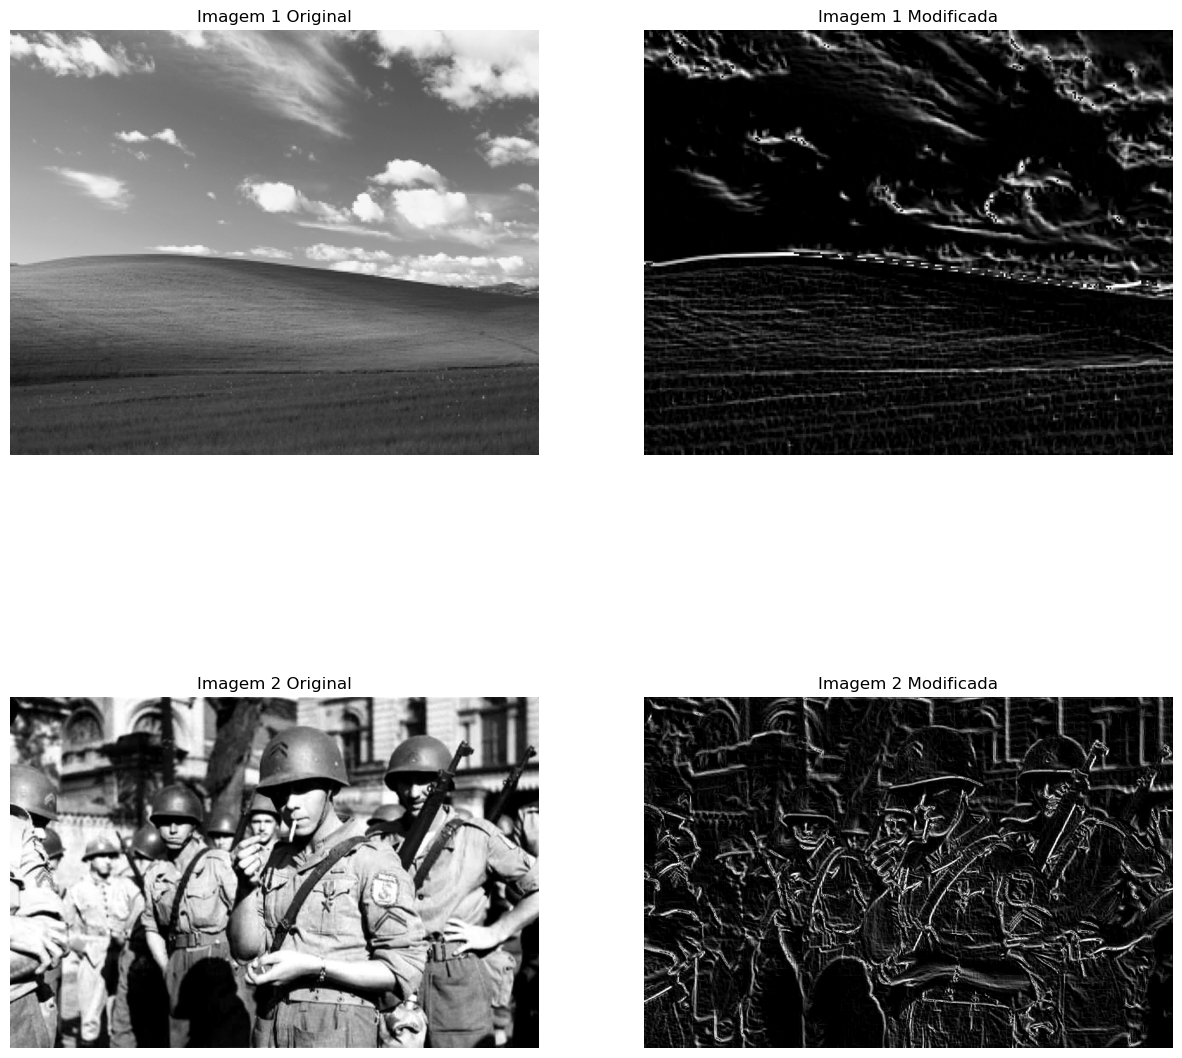

In [14]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_aluno1_prewitt_x = cv2.filter2D(img_aluno1_pb, -1, kernelx)
img_aluno1_prewitt_y = cv2.filter2D(img_aluno1_pb, -1, kernely)
img_aluno1_prewitt = img_aluno1_prewitt_x + img_aluno1_prewitt_y

img_aluno2_prewitt_x = cv2.filter2D(img_aluno2_pb, -1, kernelx)
img_aluno2_prewitt_y = cv2.filter2D(img_aluno2_pb, -1, kernely)
img_aluno2_prewitt = img_aluno2_prewitt_x + img_aluno2_prewitt_y

show_img(img_aluno1_pb, img_aluno1_prewitt, img_aluno2_pb, img_aluno2_prewitt)

7) Implemente o detector de bordas de Sobel

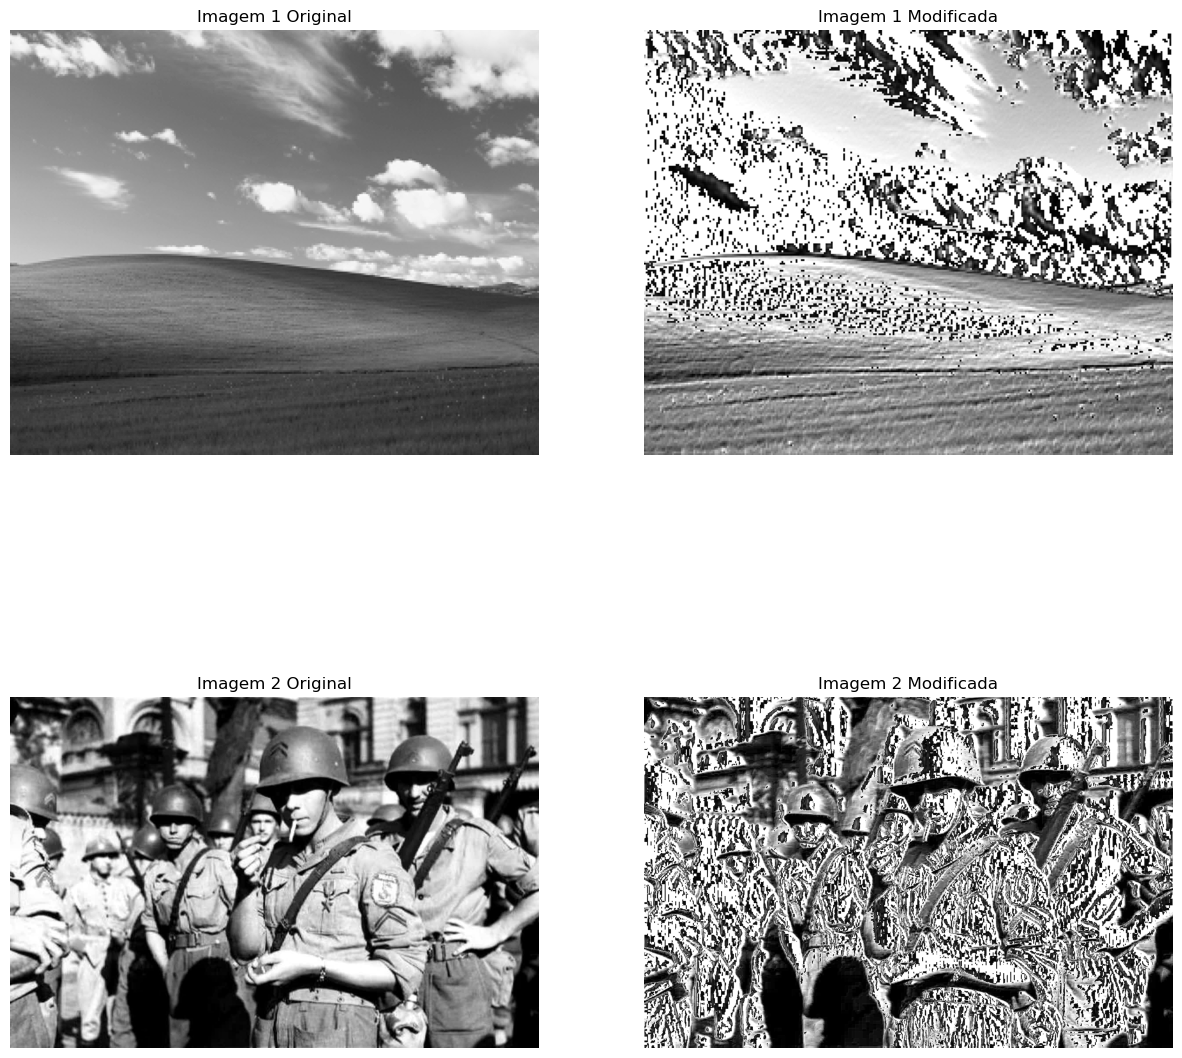

In [15]:
kernelx = np.array([[1, -2, -1],[0,0,0],[1, 2, 1]])
kernely = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

img_aluno1_sobel_x = cv2.filter2D(img_aluno1_pb, -1, kernelx)
img_aluno1_sobel_y = cv2.filter2D(img_aluno1_pb, -1, kernely)
img_aluno1_sobel = img_aluno1_sobel_x + img_aluno1_sobel_y

img_aluno2_sobel_x = cv2.filter2D(img_aluno2_pb, -1, kernelx)
img_aluno2_sobel_y = cv2.filter2D(img_aluno2_pb, -1, kernely)
img_aluno2_sobel = img_aluno2_sobel_x + img_aluno2_sobel_y

show_img(img_aluno1_pb, img_aluno1_sobel, img_aluno2_pb, img_aluno2_sobel)

8) Escolha duas imagens, realize a adição destas. 

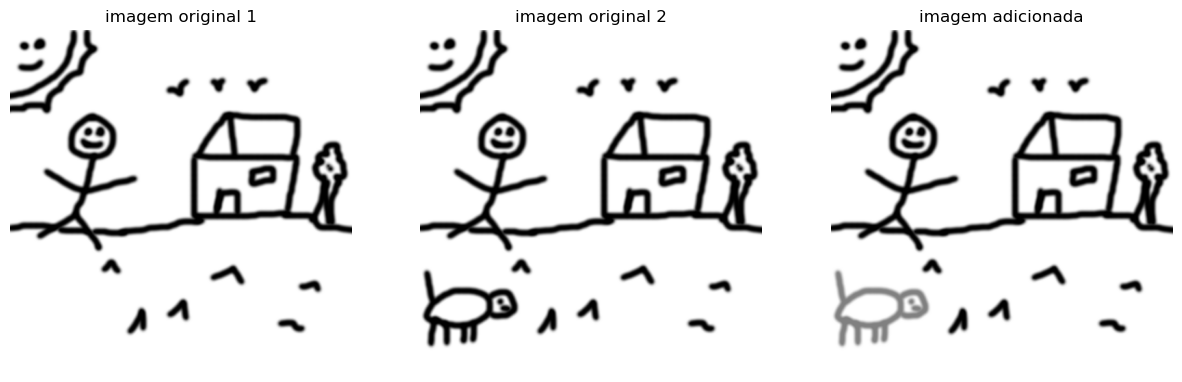

In [16]:
img_aluno12_sum = cv2.addWeighted(img_sum_sub1, 0.5, img_sum_sub2, 0.5, 0)

plt.figure(figsize=(15,15)) 

plt.subplot(131)
plt.imshow(img_sum_sub1, cmap="gray", vmin=0, vmax=255)
plt.title("imagem original 1")
plt.axis('off')

plt.subplot(132)
plt.imshow(img_sum_sub2, cmap="gray", vmin=0, vmax=255)
plt.title("imagem original 2")
plt.axis('off')

plt.subplot(133)
plt.imshow(img_aluno12_sum, cmap="gray", vmin=0, vmax=255)
plt.title("imagem adicionada")
plt.axis('off')

plt.show()

9) Escolha duas imagens, realize a subtração destas. O ideal é para representar a remoção de fundo.

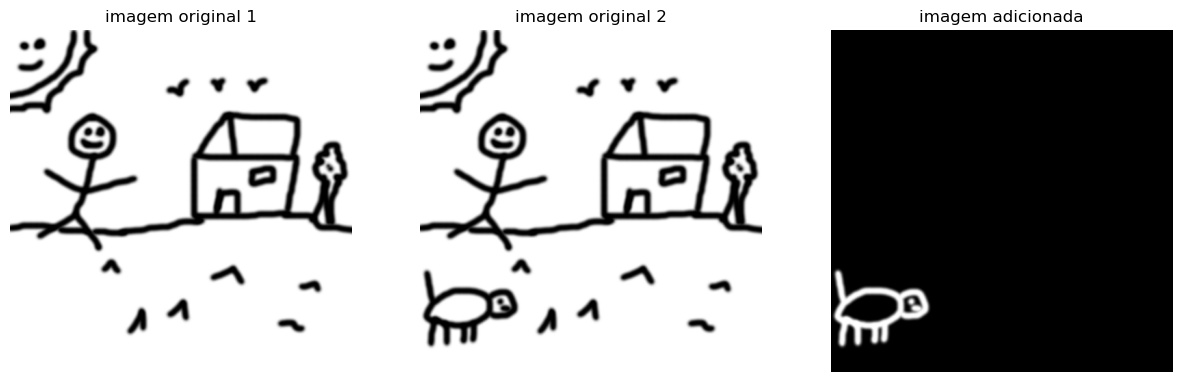

In [17]:
img_aluno12_sub = cv2.subtract(img_sum_sub1, img_sum_sub2)

plt.figure(figsize=(15,15)) 

plt.subplot(131)
plt.imshow(img_sum_sub1, cmap="gray", vmin=0, vmax=255)
plt.title("imagem original 1")
plt.axis('off')

plt.subplot(132)
plt.imshow(img_sum_sub2, cmap="gray", vmin=0, vmax=255)
plt.title("imagem original 2")
plt.axis('off')

plt.subplot(133)
plt.imshow(img_aluno12_sub, cmap="gray", vmin=0, vmax=255)
plt.title("imagem adicionada")
plt.axis('off')

plt.show()